# Phase I : Processing, Wrangling & Visualizing Data

## 1.1 Data Collection et Description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

### chargement des données

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.rename(columns={'MedHouseVal': 'Target'}, inplace=True)

print("Description du dataframe :")
print(df.info())

print("\nPremières lignes: ")
print(df.head())

Description du dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Premières lignes: 
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059     

## 1.2 Data Summarization et Wrangling 

### Tâche 1.2

In [10]:
print("\nStatistiques descriptives:")
print(df.describe())

# Vérifions les valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())


Statistiques descriptives:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min 

In [21]:
# Parfait aucune valeur manquante 
# S'il y en avait, on les aurait remplacé chacune par la moyenne de la colonne correspondante

### Tâche 1.3

In [26]:
X = df.drop('Target', axis=1)  # supression de la colonne Target et affectation a X

y = df['Target'] # extraction de la colonne Target et affectation a y

## 1.3 Data Visualization

### Tâche 1.4

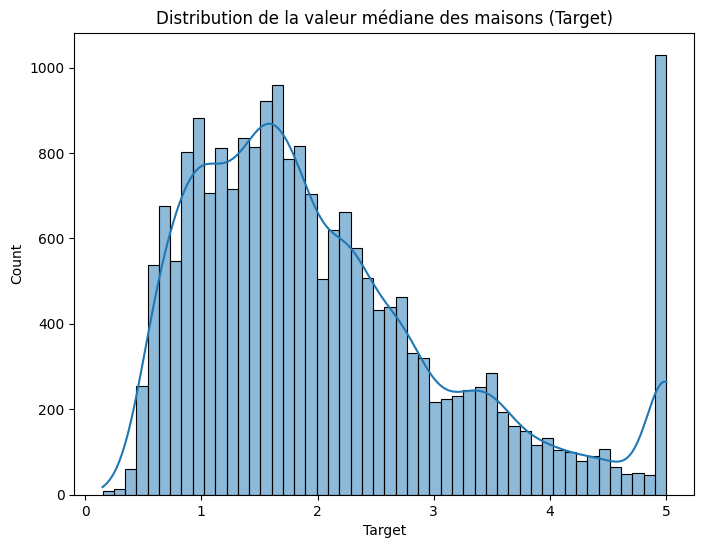

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(df['Target'], bins=50, kde=True)
plt.title('Distribution de la valeur médiane des maisons (Target)')
plt.show()

### Tâche 1.5

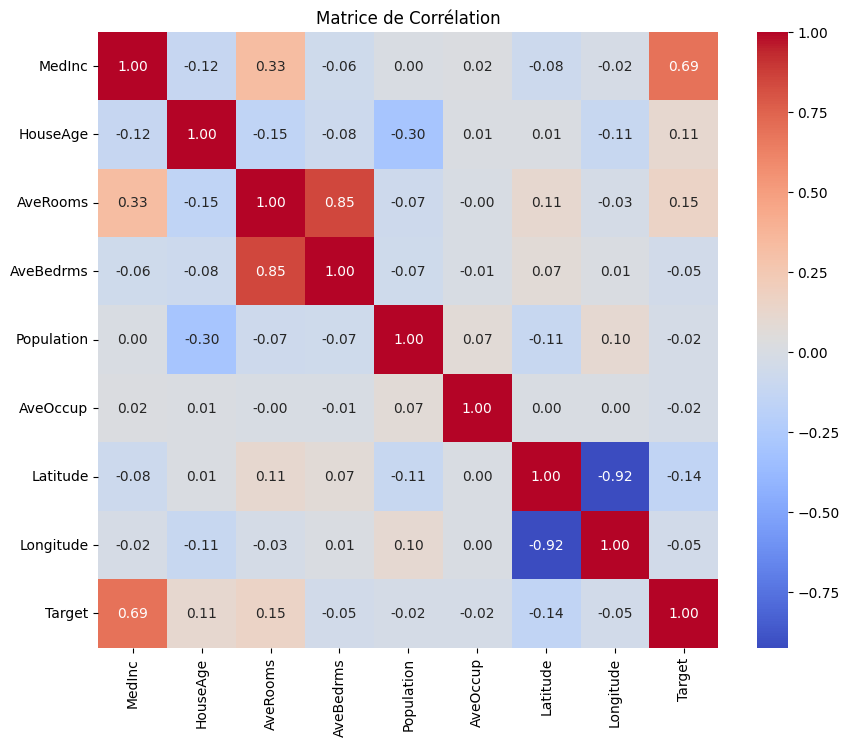

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

# Phase II : Feature Engineering and Selection

## 2.1 Feature Extraction and Engineering

### Tâche 2.1

In [32]:
X['RoomsPerHousehold'] = X['AveRooms'] / X['AveOccup']
X['BedroomsPerRoom'] = X['AveBedrms'] / X['AveRooms']
X['PopulationPerHousehold'] = X['Population'] / X['AveOccup']

# Séparation des données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## 2.2 Feature Scaling

### Tâche 2.2

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("\nÉchelle des données après standardisation (premières lignes):")
print(X_train_scaled.head())



Échelle des données après standardisation (premières lignes):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -1.489797 -0.843593 -0.763120  -0.119626   -0.769791 -0.049871 -0.744072   
1 -1.146726  1.854460 -0.309796  -0.139434   -0.903138 -0.046443  1.036328   
2 -0.652466  0.029306 -0.829992  -0.201910    1.010210  0.157246 -0.776869   
3 -0.238651  1.854460 -0.384189  -0.613287   -0.278514  0.718139  1.921843   
4 -1.295292  1.378333 -0.439801   0.187200   -0.560121  0.001289 -0.772184   

   Longitude  RoomsPerHousehold  BedroomsPerRoom  PopulationPerHousehold  
0   0.681507          -0.468360         1.234347               -0.738716  
1  -1.355238          -0.117021         0.107883               -0.904128  
2   0.711459          -1.133125         1.267463                0.075217  
3  -1.140581          -1.417116        -0.565942               -1.053786  
4   0.636579          -0.497898         0.945611               -0.644194  


## 2.3 Feature Selection

### Tâche 2.3


Importance des caractéristiques:
                   feature  importance
0                   MedInc    0.522829
5                 AveOccup    0.124691
6                 Latitude    0.077495
7                Longitude    0.076984
1                 HouseAge    0.052273
9          BedroomsPerRoom    0.037509
8        RoomsPerHousehold    0.026869
2                 AveRooms    0.022485
3                AveBedrms    0.022184
10  PopulationPerHousehold    0.019188
4               Population    0.017493

Top 5 caractéristiques: ['MedInc', 'AveOccup', 'Latitude', 'Longitude', 'HouseAge']


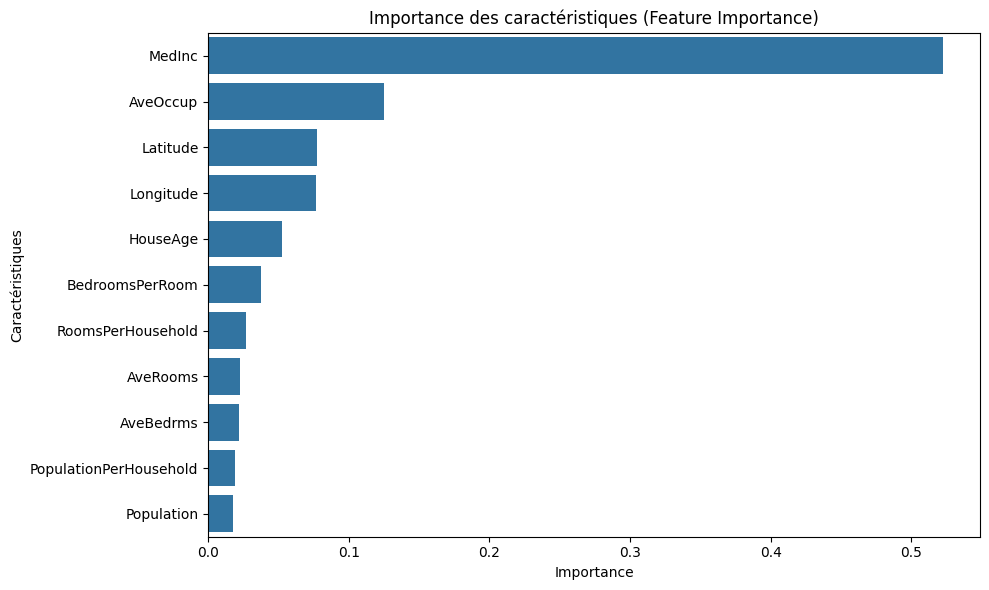

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Entraîner un Random Forest pour obtenir l'importance des features
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X_train_scaled, y_train)

# Obtenir l'importance des caractéristiques
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportance des caractéristiques:")
print(feature_importance)

# Sélectionner les 5 caractéristiques les plus importantes
top_5_features = feature_importance.head(5)['feature'].tolist()
print(f"\nTop 5 caractéristiques: {top_5_features}")

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importance des caractéristiques (Feature Importance)')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()

# Phase III : Building, Tuning Deploying Models

## 3.1 Model Building

### Tâche 3.1

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


#Modèle 1: Régression Linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

#Modèle 2: Forêt Aléatoire (hyperparamètres de base)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_reg.fit(X_train_scaled, y_train)
print("\nModèles entraînés.")


Modèles entraînés.


### 3.2 Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error

#Prédictions
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_forest = forest_reg.predict(X_test_scaled)

#Évaluation Régression Linéaire
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

#Évaluation Forêt Aléatoire
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
print(f"\n[Régression Linéaire] RMSE: {rmse_lin:.4f}")
print(f"[Forêt Aléatoire] RMSE: {rmse_forest:.4f}")


[Régression Linéaire] RMSE: 0.6711
[Forêt Aléatoire] RMSE: 0.5114


### 3.3 Model Interpretation


Importance des caractéristiques (Modèle Final):
                   feature  importance
0                   MedInc    0.522829
5                 AveOccup    0.124691
6                 Latitude    0.077495
7                Longitude    0.076984
1                 HouseAge    0.052273
9          BedroomsPerRoom    0.037509
8        RoomsPerHousehold    0.026869
2                 AveRooms    0.022485
3                AveBedrms    0.022184
10  PopulationPerHousehold    0.019188
4               Population    0.017493


/tmp/ipykernel_715766/3247037775.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_final, x='importance', y='feature', palette='viridis')


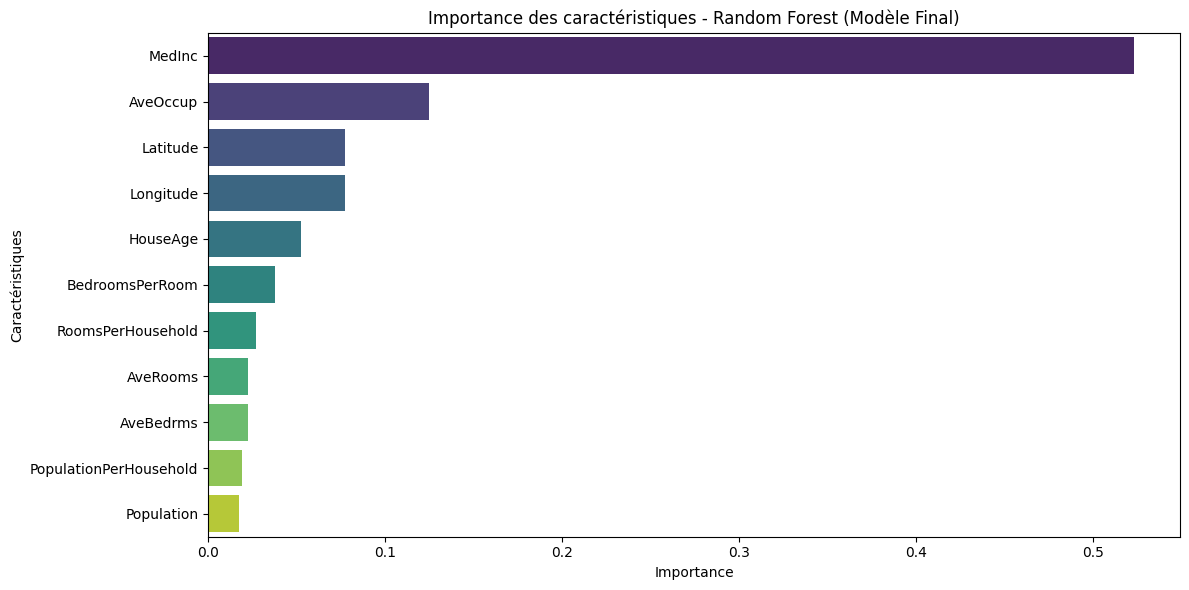


Comparaison avec la sélection de features (Tâche 2.3):
Les caractéristiques les plus importantes sont cohérentes avec l'analyse précédente.


In [43]:
# Obtenir l'importance des features du modèle Random Forest entraîné
feature_importance_final = pd.DataFrame({
    'feature': X_train.columns,
    'importance': forest_reg.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportance des caractéristiques (Modèle Final):")
print(feature_importance_final)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_final, x='importance', y='feature', palette='viridis')
plt.title('Importance des caractéristiques - Random Forest (Modèle Final)')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()

# Comparaison avec la Tâche 2.3
print("\nComparaison avec la sélection de features (Tâche 2.3):")
print("Les caractéristiques les plus importantes sont cohérentes avec l'analyse précédente.")

### 3.4 Model Deployment (Simulé)

In [42]:
import joblib
# Sauvegarder le meilleur modèle (ici, le Random Forest)
joblib.dump(forest_reg, 'random_forest_regressor.pkl')
print("\nModèle 'random_forest_regressor.pkl' sauvegardé.")

#Test de chargement
loaded_model = joblib.load('random_forest_regressor.pkl')
print(f"Modèle chargé. Test de prédiction sur le premier élément du test: {loaded_model}")


Modèle 'random_forest_regressor.pkl' sauvegardé.
Modèle chargé. Test de prédiction sur le premier élément du test: RandomForestRegressor(n_jobs=-1, random_state=42)


# Conclusion et Perspectives

### Tâche 4.2

In [44]:
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle Random Forest
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# GridSearchCV avec validation croisée
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Entraîner avec GridSearchCV
print("\nRecherche des meilleurs hyperparamètres...")
grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres
print(f"\nMeilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleur score (MSE négatif): {grid_search.best_score_:.4f}")

# Évaluer le modèle optimisé
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_scaled)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)

print(f"\n[Random Forest Optimisé] RMSE: {rmse_optimized:.4f}")
print(f"Amélioration par rapport au modèle de base: {rmse_forest - rmse_optimized:.4f}")

# Sauvegarder le modèle optimisé
joblib.dump(best_model, 'random_forest_optimized.pkl')
print("\nModèle optimisé sauvegardé: 'random_forest_optimized.pkl'")


Recherche des meilleurs hyperparamètres...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Meilleurs paramètres: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur score (MSE négatif): -0.2734

[Random Forest Optimisé] RMSE: 0.5096
Amélioration par rapport au modèle de base: 0.0017

Modèle optimisé sauvegardé: 'random_forest_optimized.pkl'
